<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/RanFor_JobSat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Step 1: Download the dataset
path = kagglehub.dataset_download("mahdimashayekhi/social-media-vs-productivity")
print("Path to dataset files:", path)

100%|██████████| 2.26M/2.26M [00:00<00:00, 36.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mahdimashayekhi/social-media-vs-productivity/versions/1


In [3]:
# Step 2: Load the CSV file
file_path = path + "/social_media_vs_productivity.csv"
df = pd.read_csv(file_path)

In [4]:
# Step 3: Explore and preprocess the data
print("Dataset Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Fill or drop missing values (here, dropping rows with missing values)
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work

<ipython-input-4-0bc6b4243f95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-4-0bc6b4243f95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-4-0bc6b4243f95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [5]:
# Step 4: Define features and target
X = df.drop("job_satisfaction_score", axis=1)
y = df["job_satisfaction_score"]

In [6]:
# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 6: Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# Step 7: Evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Model Performance:
Mean Squared Error: 1.03
R^2 Score: 0.77


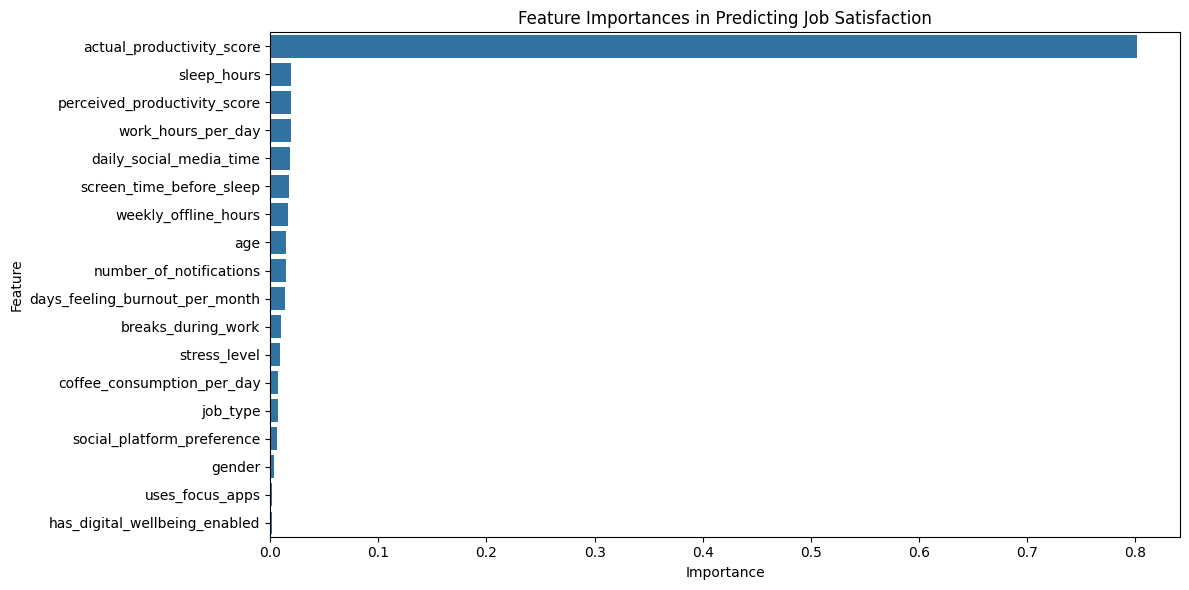

In [9]:
# Step 8: Feature Importance Visualization
importances = rf.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances in Predicting Job Satisfaction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()